<a href="https://colab.research.google.com/github/tanriders/Construction_Building-Energy-Prediction-models/blob/main/DS_Construction_Building_Energy_Prediction_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **“การออกแบบอาคารเพื่อการอนุรักษ์พลังงาน”**

“การออกแบบอาคารเพื่อการอนุรักษ์พลังงาน”

สัดส่วนการใช้พลังงานในอาคารจะเป็นของระบบปรับอากาศ 65% ระบบไฟฟ้าแสงสว่าง 25% และระบบอื่นๆ 10% ดังนั้น การประหยัดพลังงานในอาคารส่วนใหญ่จึงมุ่งเน้นไปที่การลดใช้พลังงานในการดำเนิน กิจกรรมในอาคาร การออกแบบระบบปรับอากาศ และระบบไฟฟ้าแสงสว่างให้มีประสิทธิภาพ แต่อย่างไรก็ตามหากการออกแบบอาคารไม่มีประสิทธิภาพในการป้องกันความร้อนแล้ว การประหยัดพลังงานในอาคารก็ไม่สามารถบรรลุเป้าหมายได้

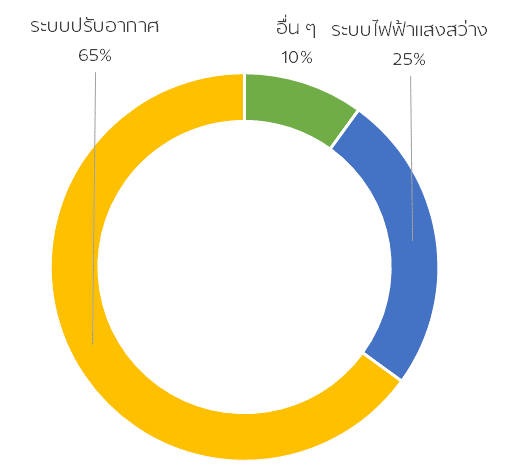

#**Building Energy Efficiency Prediction models**

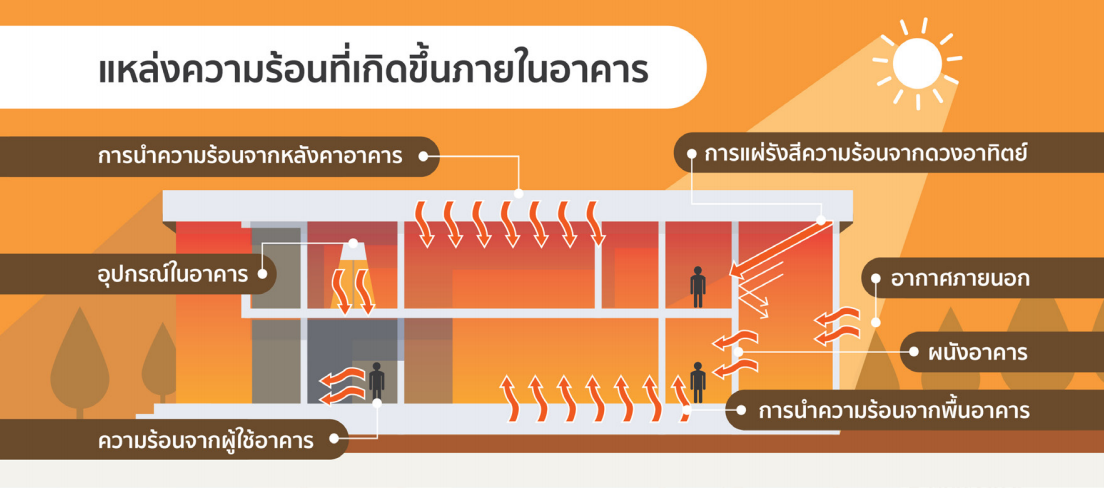

**แหล่งความร้อนที่เกิดขึ้นภายในอาคาร**

* การนำความร้อนจากหลังคาอาคาร

* การแผ่รังสีของดวงอาทิตย์

* อากาศภายนอก

* ผนังอาคาร

* อุปกรณ์ในอาคาร

* ความร้อนจากผู้ใช้อาคาร

* การนำความร้อนจากพื้นอาคาร

เนื่องจากการเปลี่ยนแปลงสภาพภูมิอากาศกลายเป็นประเด็นสำคัญในโลกปัจจุบัน และกฎระเบียบเกี่ยวกับ**ประสิทธิภาพการใช้พลังงานของอาคาร (ภาระความร้อนและภาระความเย็น)** มีความเข้มงวดมากขึ้นเรื่อยๆ

สิ่งสำคัญคือต้องเข้าใจการใช้พลังงานของอาคารและมีการประมาณค่าพลังงานได้ดี ในขั้นตอนการออกแบบอาคาร แม้ว่าโซลูชันการประมาณค่าพลังงานแบบเดิมอาจใช้เวลานานและมีค่าใช้จ่ายสูง แต่การเรียนรู้ของเครื่อง (Machine Learning) เป็นทางเลือกอีกทางหนึ่งในด้านนี้

การศึกษานี้ประเมินข้อกำหนดภาระการทำความร้อนและภาระความเย็น (heating load and cooling load) ของอาคาร (ประสิทธิภาพการใช้พลังงาน) โดยเป็นส่วนหนึ่งของพารามิเตอร์ของอาคาร

เราทำการวิเคราะห์พลังงานโดยใช้รูปทรงอาคารที่แตกต่างกัน 12 แบบ

อาคารจะแตกต่างกันไปตามพื้นที่กระจก การกระจายพื้นที่กระจก และทิศทาง รวมถึงพารามิเตอร์อื่นๆ เราจำลองการตั้งค่าต่างๆ เป็นฟังก์ชันของคุณลักษณะด้านบนเพื่อให้ได้รูปทรงสิ่งปลูกสร้าง 768 แบบ

**เราจะมาสร้างโมเดลเพื่อสร้างแบบจำลองการเรียนรู้ของเครื่อง (Machine Learning) เพื่อคาดการณ์โหลดการทำความร้อนและความเย็นของ อาคาร**

#**Import Library**

In [ ]:
#EDA Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling Library
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

# **Import Dataset**

**Energy Efficiency Data**

Dataset: https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set

ชุดข้อมูลประกอบด้วยอาคารที่พักอาศัยจำนวน 768 ตัวอย่าง แต่ละอาคารจะประกอบด้วย 8 features และ 2 target


**วัตถุประสงค์ คือ การใช้คุณสมบัติ 8 features เหล่านี้เพื่อทำนายแต่ละผลลัพธ์  2 target**


**Features:**
1. **Relative Compactness (ความหนาแน่นสัมพัทธ์):** This is the relative compactness of the building, which is defined as the ratio of the building's volume to the volume of an equivalent cuboid that encloses the building. This variable ranges from 0.62 to 0.98.

รูปที่ 1 Relative Compactness coefficient variation

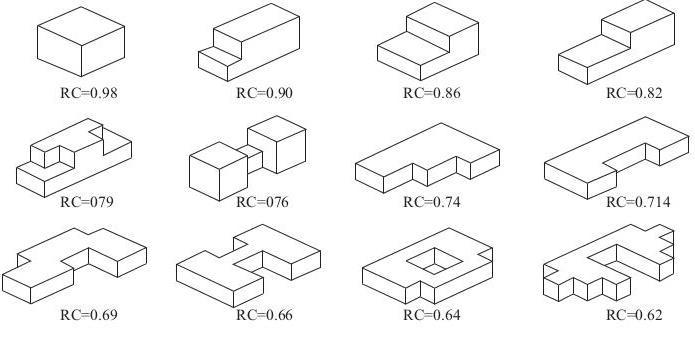

2. **Surface Area (พื้นที่ผิว) - m²:** This is the total surface area of the building, including walls, roof, and windows. This variable ranges from 514.5 to 808.5 square meters.

3. **Wall Area (พื้นที่ผนัง) - m²:** This is the total area of the building's walls. This variable ranges from 245 to 416.5 square meters.

4. **Roof Area (พื้นที่หลังคา) - m²:** This is the total area of the building's roof. This variable ranges from 110.25 to 220.5 square meters.

5. **Overall Height (ความสูง) - m:** This is the height of the building. This variable ranges from 3.5 to 7.0 meters.

6. **Orientation (ทิศทางการวางอาคาร)** - 2:North, 3:East, 4:South, 5:West: This is the orientation of the building. The values 2, 3, 4, and 5 represent North, East, South, and West orientations, respectively.

7. **Glazing Area (พื้นที่กระจก)** - 0%, 10%, 25%, 40% (of floor area): This is the total glazing area of the building, expressed as a percentage of the floor area. This variable can take on one of four values: 0%, 10%, 25%, or 40%.

8. **Glazing Area Distribution (การกระจายพื้นที่กระจก)** - 1:Uniform, 2:North, 3:East, 4:South, 5:West: This is the distribution of glazing area across the building. The values 1, 2, 3, 4, and 5 represent a uniform distribution and North, East, South, and West distributions, respectively.

**Predict:**
1. **Heating Load (ภาระการทำความร้อน) - kWh/m²:** This is the heating load of the building, expressed in kilowatt-hours per square meter. This variable ranges from 6.01 to 43.1 kWh/m².

2. **Cooling Load (ภาระการทำความเย็น)- kWh/m²:** This is the cooling load of the building, expressed in kilowatt-hours per square meter. This variable ranges from 10.9 to 48.03 kWh/m².

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/DS-Construction/energy_efficiency_data.csv")
df.shape

(768, 10)

# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# View summary statistics of the data
df.describe().style.background_gradient(cmap="magma")

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.234375,2.812500,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.751140,1.118763,0.133221,1.550960,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.100000,1.750000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.250000,3.000000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.400000,4.000000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000



* **Heating_Load** โดยแสดงถึงภาระความร้อนในหน่วย kWh/m² สำหรับแต่ละอาคารในชุดข้อมูล เป็นตัวแปรตัวเลขต่อเนื่อง ค่าต่ำสุดและสูงสุดคือ 6.01 และ 43.1 ตามลำดับ ค่าเฉลี่ยคือ 22.31 kWh/m² และค่าเบี่ยงเบนมาตรฐานคือ 10.09 kWh/m² ค่าในคอลัมน์นี้แสดงถึงปริมาณพลังงานที่จำเป็นในการทำความร้อนอาคารให้มีอุณหภูมิที่สะดวกสบายในฤดูหนาว

* **Cooling_Load** โดยแสดงถึงภาระการทำความเย็น (เป็น kWh/m²) สำหรับแต่ละอาคารโดยพิจารณาจากคุณสมบัติต่างๆ เช่น ความกะทัดรัดสัมพัทธ์ พื้นที่ผิว พื้นที่ผนัง พื้นที่หลังคา ความสูงโดยรวม การวางแนว พื้นที่กระจก และการกระจายพื้นที่กระจก ภาระการทำความเย็นคือปริมาณความร้อนที่ต้องขจัดออกจากอาคารเพื่อรักษาอุณหภูมิภายในอาคารให้สบาย คอลัมน์นี้มีช่วงตั้งแต่ค่าต่ำสุด 10.90 kWh/m² ถึงค่าสูงสุด 48.03 kWh/m² โดยมีค่าเฉลี่ย 24.59 kWh/m² และค่าเบี่ยงเบนมาตรฐาน 9.51 kWh/m²

**Histogram of features**

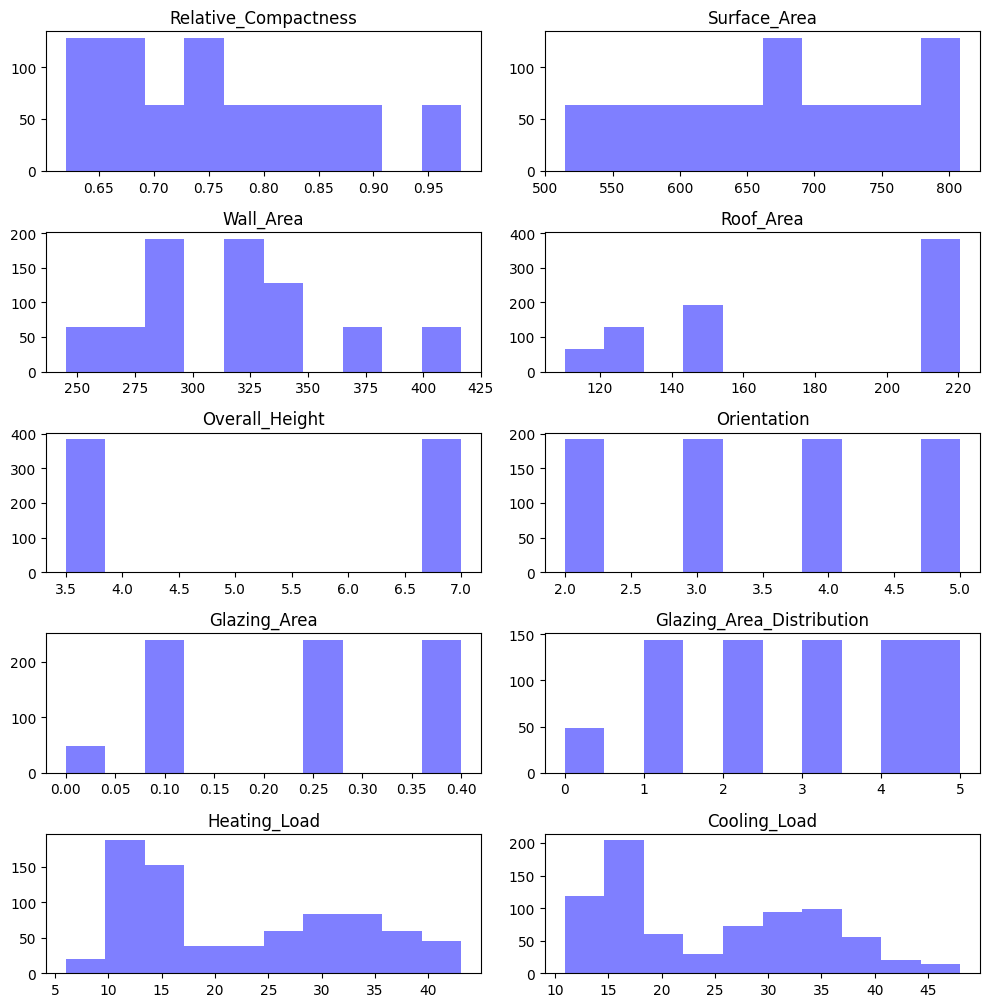

In [ ]:
num_list = list(df.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]],color='blue',alpha=0.5)

plt.tight_layout()

**Pairplot of features**

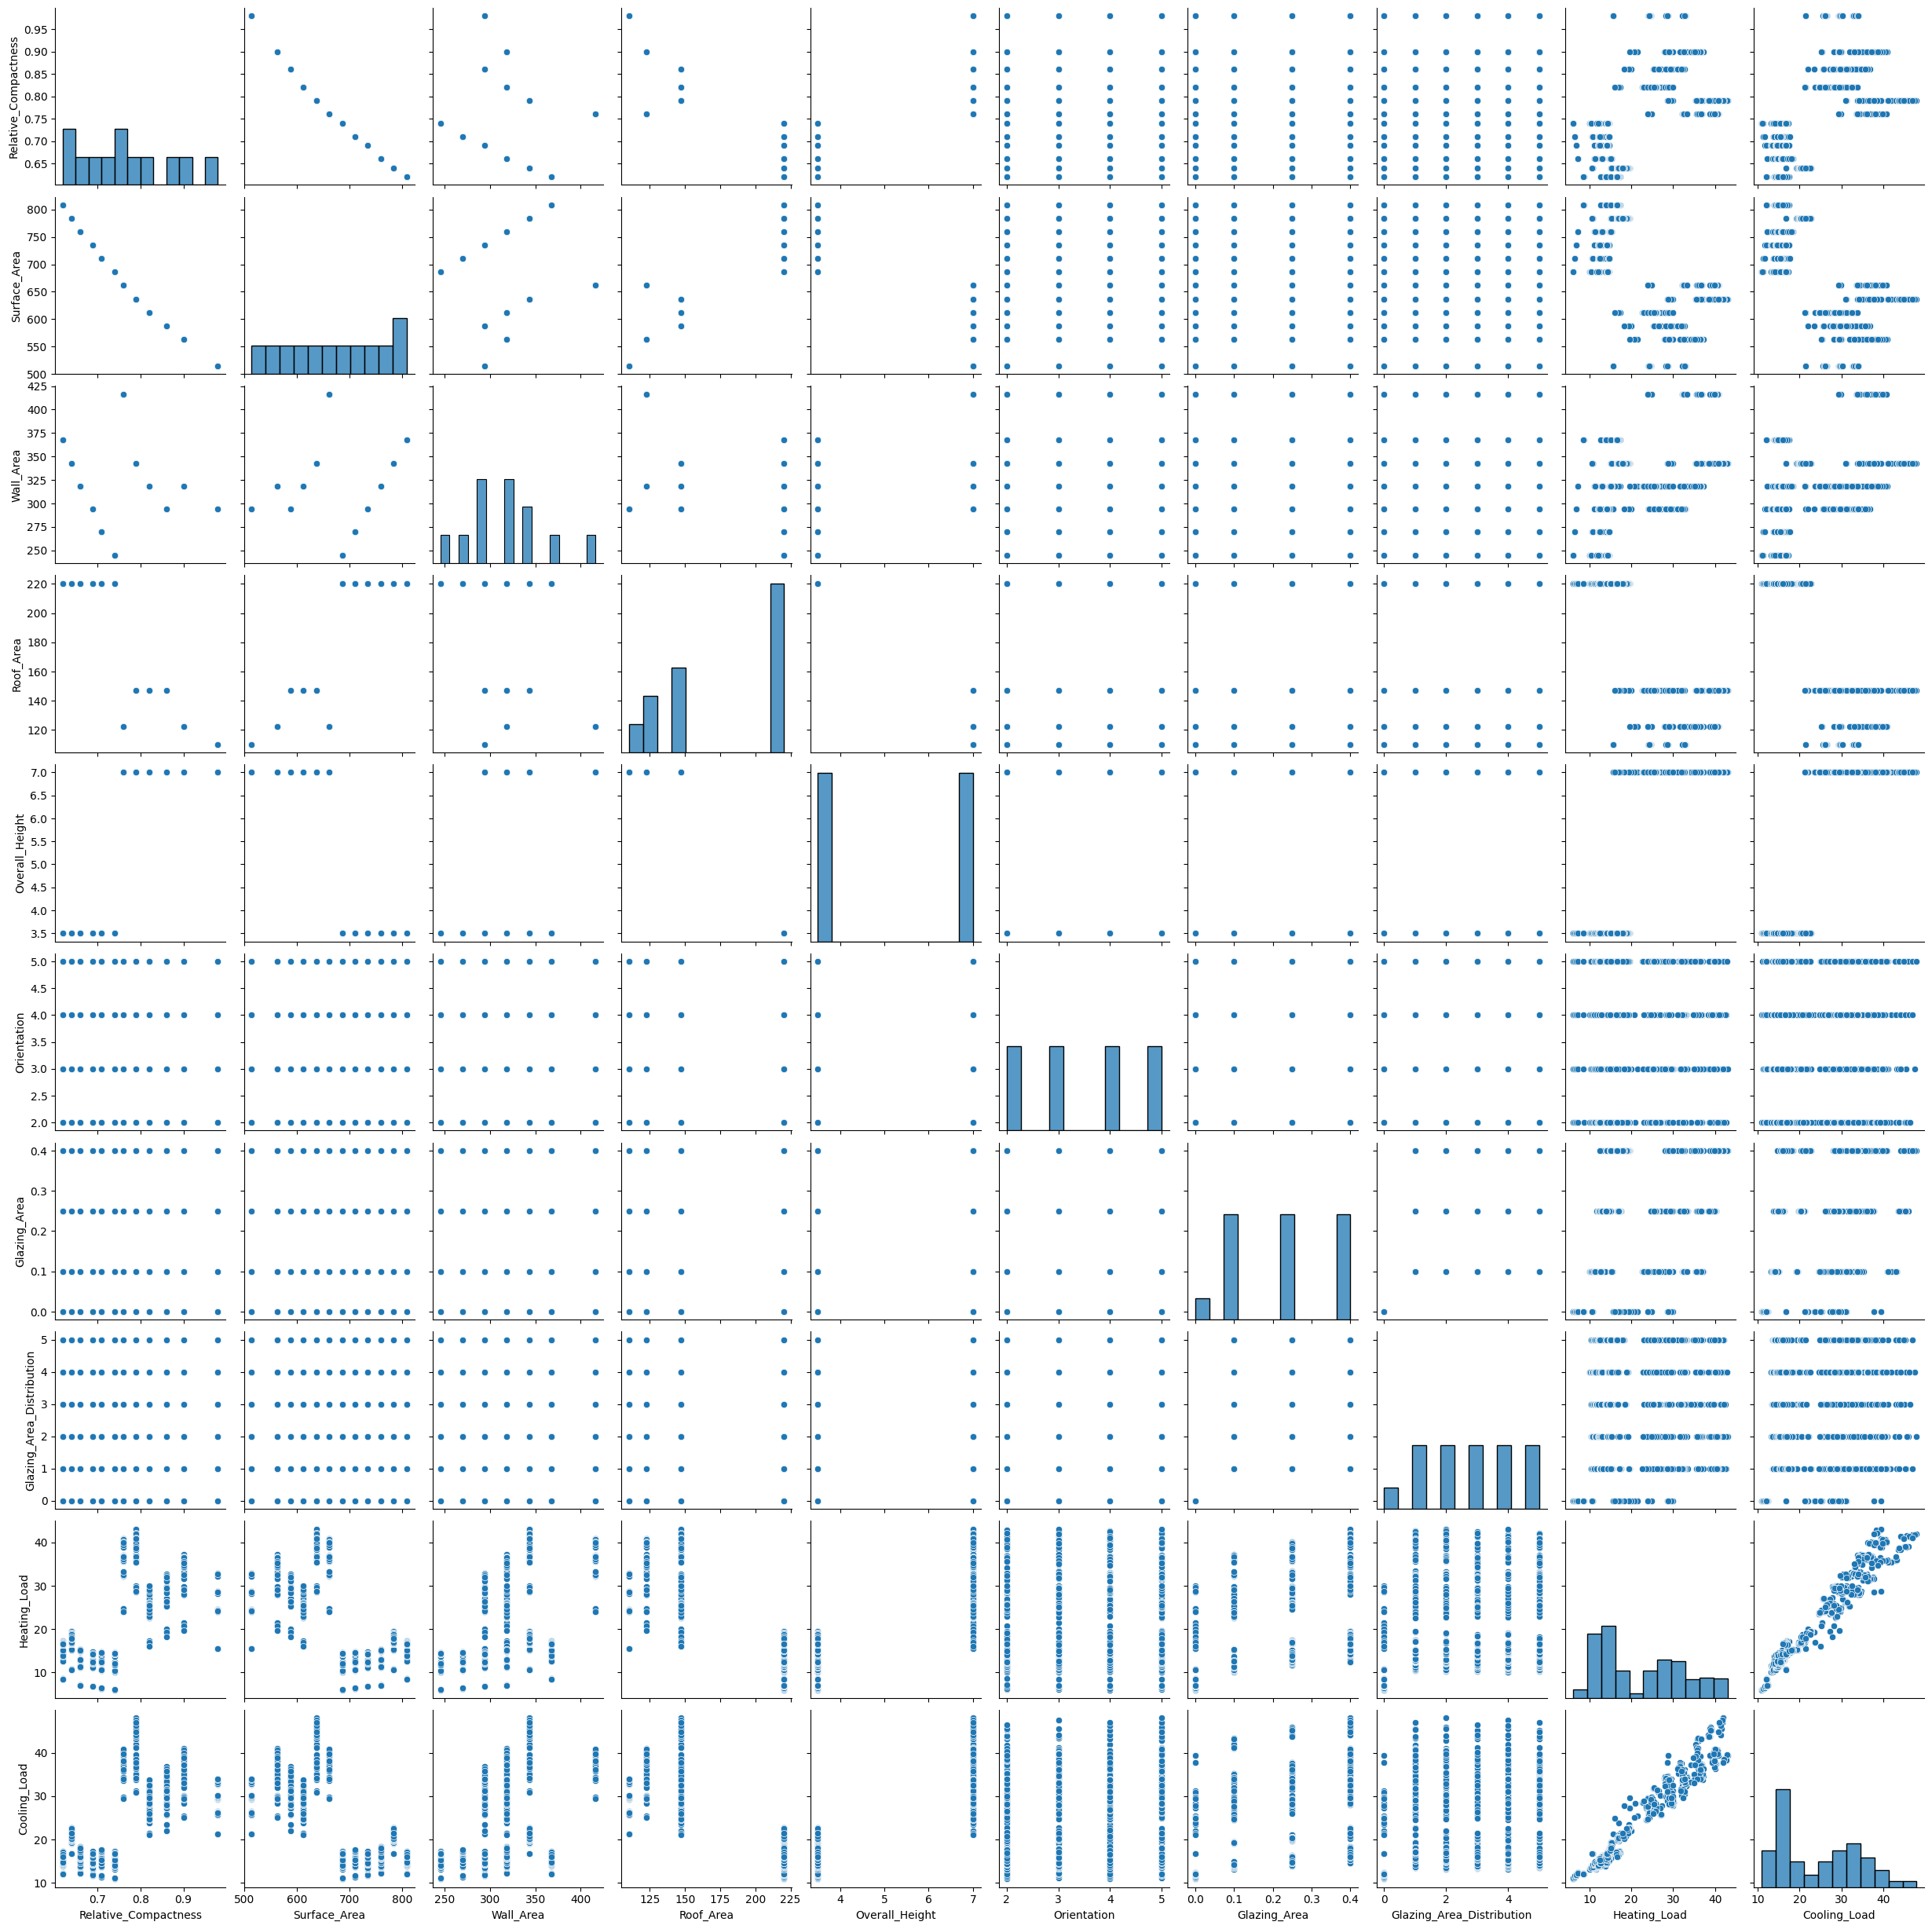

In [ ]:
sns.pairplot(df)

The relative_compactness and surface_area are highly correlated, and surface_area has higher correlation with other variables than relative_compactness, so I dropped surface_area to avoid collinearity.

The orientation has almost no correlation with heating_load and cooling_load, so I should consider dropping orientation to reduce dimensionality.

**Correlation of features**

<Axes: >

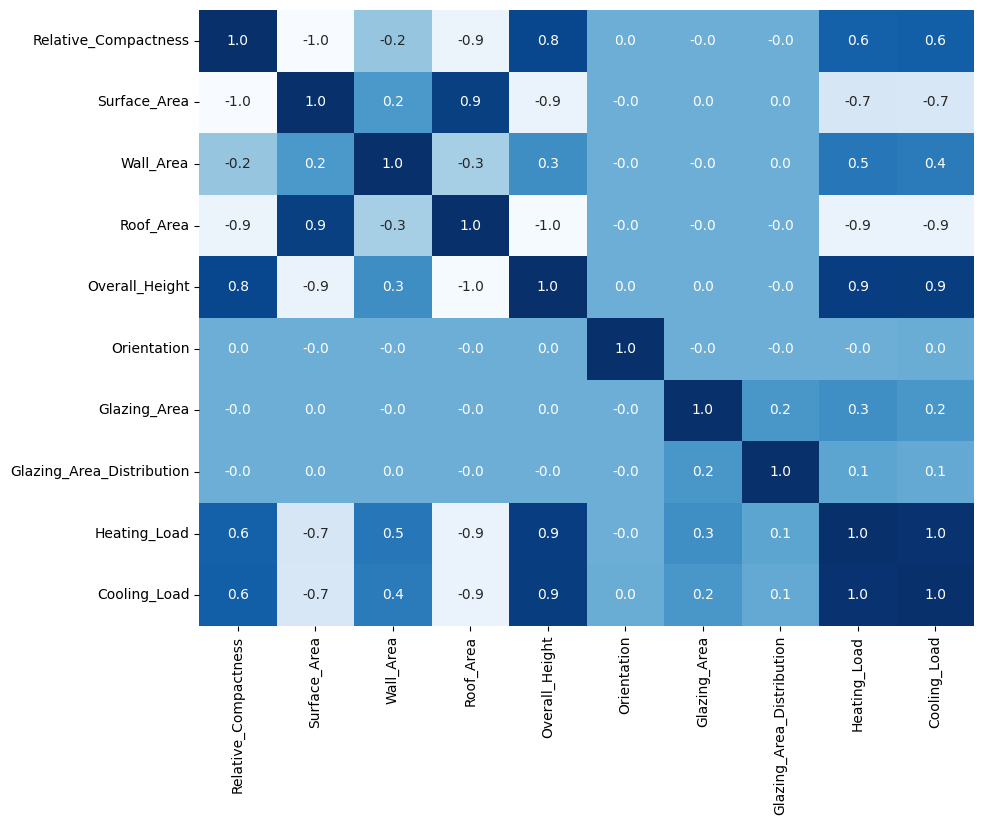

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

# **Modeling**

This time, we have two targets, 'Heating_Load' and 'Cooling_Load'. So I set Y1 and Y2.

In [ ]:
X=df.drop(['Heating_Load','Cooling_Load'],axis=1)
Y = df[['Heating_Load', 'Cooling_Load']]
Y1= df[['Heating_Load']]
Y2= df[['Cooling_Load']]

In [ ]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.2, random_state = 20)

##**DecisionTree Regressor**

In [ ]:
model_DT = DecisionTreeRegressor()
#Heating Load
model_DT.fit(X_train,y1_train)
#R-squared (R2) -train_Heating
DT_train_Heating = r2_score(y1_train, model_DT.predict(X_train))
#R-squared (R2) -test_Heating
DT_test_Heating = r2_score(y1_test, model_DT.predict(X_test))
DT_Heating_Predicion = model_DT.predict(X_test)

#Cooling Load
model_DT.fit(X_train,y2_train)
#R-squared (R2) -train_Cooling
DT_train_Cooling = r2_score(y2_train, model_DT.predict(X_train))
DT_test_Cooling = r2_score(y2_test, model_DT.predict(X_test))
DT_Cooling_Predicion = model_DT.predict(X_test)

# สร้างรายงาน
DT_R2 = pd.DataFrame({
    'R-squared: DecisionTreeRegressor': [
        'train', 'Test'
    ],

    'Heating Load':
    [DT_train_Heating, DT_test_Heating],

    'Cooling Load': [
        DT_train_Cooling, DT_test_Cooling
    ]
})

pd.set_option('display.precision', 2)

DT_R2.sort_values(by='Heating Load', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<ipython-input-48-ebd890c2a99c>:34: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  cmap='coolwarm').hide_index().set_properties(**{


R-squared: DecisionTreeRegressor,Heating Load,Cooling Load
train,1.000000,1.000000
Test,0.997326,0.934612


##**RandomForest Regressor**

In [ ]:
model_RF = RandomForestRegressor()
#Heating Load
model_RF.fit(X_train,y1_train)
#R-squared (R2) -train_Heating
RF_train_Heating = r2_score(y1_train, model_RF.predict(X_train))
#R-squared (R2) -test_Heating
RF_test_Heating = r2_score(y1_test, model_RF.predict(X_test))
RF_Heating_Predicion = model_RF.predict(X_test)

#Cooling Load
model_RF.fit(X_train,y2_train)
#R-squared (R2) -train_Cooling
RF_train_Cooling = r2_score(y2_train, model_RF.predict(X_train))
RF_test_Cooling = r2_score(y2_test, model_RF.predict(X_test))
RF_Cooling_Predicion = model_RF.predict(X_test)

# สร้างรายงาน
RF_R2 = pd.DataFrame({
    'R-squared: RandomForestRegressor': [
        'train', 'Test'
    ],

    'Heating Load':
    [RF_train_Heating, RF_test_Heating],

    'Cooling Load': [
        RF_train_Cooling, RF_test_Cooling
    ]
})

pd.set_option('display.precision', 2)

RF_R2.sort_values(by='Heating Load', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<ipython-input-51-0779172b464e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(X_train,y1_train)
<ipython-input-51-0779172b464e>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(X_train,y2_train)
<ipython-input-51-0779172b464e>:34: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  cmap='coolwarm').hide_index().set_properties(**{


R-squared: RandomForestRegressor,Heating Load,Cooling Load
train,0.999620,0.995962
Test,0.997820,0.967723


##**KNeighbors Regressor**

In [ ]:
model_KN = KNeighborsRegressor()
#Heating Load
model_KN.fit(X_train,y1_train)
#R-squared (R2) -train_Heating
KN_train_Heating = r2_score(y1_train, model_KN.predict(X_train))
#R-squared (R2) -test_Heating
KN_test_Heating = r2_score(y1_test, model_KN.predict(X_test))
KN_Heating_Predicion = model_KN.predict(X_test)

#Cooling Load
model_KN.fit(X_train,y2_train)
#R-squared (R2) -train_Cooling
KN_train_Cooling = r2_score(y2_train, model_KN.predict(X_train))
KN_test_Cooling = r2_score(y2_test, model_KN.predict(X_test))
KN_Cooling_Predicion = model_KN.predict(X_test)

# สร้างรายงาน
KN_R2 = pd.DataFrame({
    'R-squared: KNeighborsRegressor': [
        'train', 'Test'
    ],

    'Heating Load':
    [KN_train_Heating, KN_test_Heating],

    'Cooling Load': [
        KN_train_Cooling, KN_test_Cooling
    ]
})

pd.set_option('display.precision', 2)

KN_R2.sort_values(by='Heating Load', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<ipython-input-52-9a1b6e8c2283>:34: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  cmap='coolwarm').hide_index().set_properties(**{


R-squared: KNeighborsRegressor,Heating Load,Cooling Load
train,0.969174,0.974866
Test,0.933185,0.951100


# **Comparison Evaluation**

In [ ]:
Models_R2 = pd.DataFrame({
    'R-squared: MODELS': [
        'DecisionTreeRegressor', 'RandomForestRegressor','KNeighborsRegressor'
    ],

    'Heating Load':
    [DT_test_Heating,RF_test_Heating, KN_test_Heating],

    'Cooling Load': [
        DT_test_Cooling,RF_test_Cooling, KN_test_Cooling
    ]
})

pd.set_option('display.precision', 2)

Models_R2.sort_values(by='Heating Load', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

<ipython-input-53-9714e9d76409>:17: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  cmap='coolwarm').hide_index().set_properties(**{


R-squared: MODELS,Heating Load,Cooling Load
RandomForestRegressor,0.997820,0.967723
DecisionTreeRegressor,0.997326,0.934612
KNeighborsRegressor,0.933185,0.951100


# **Conclusion**

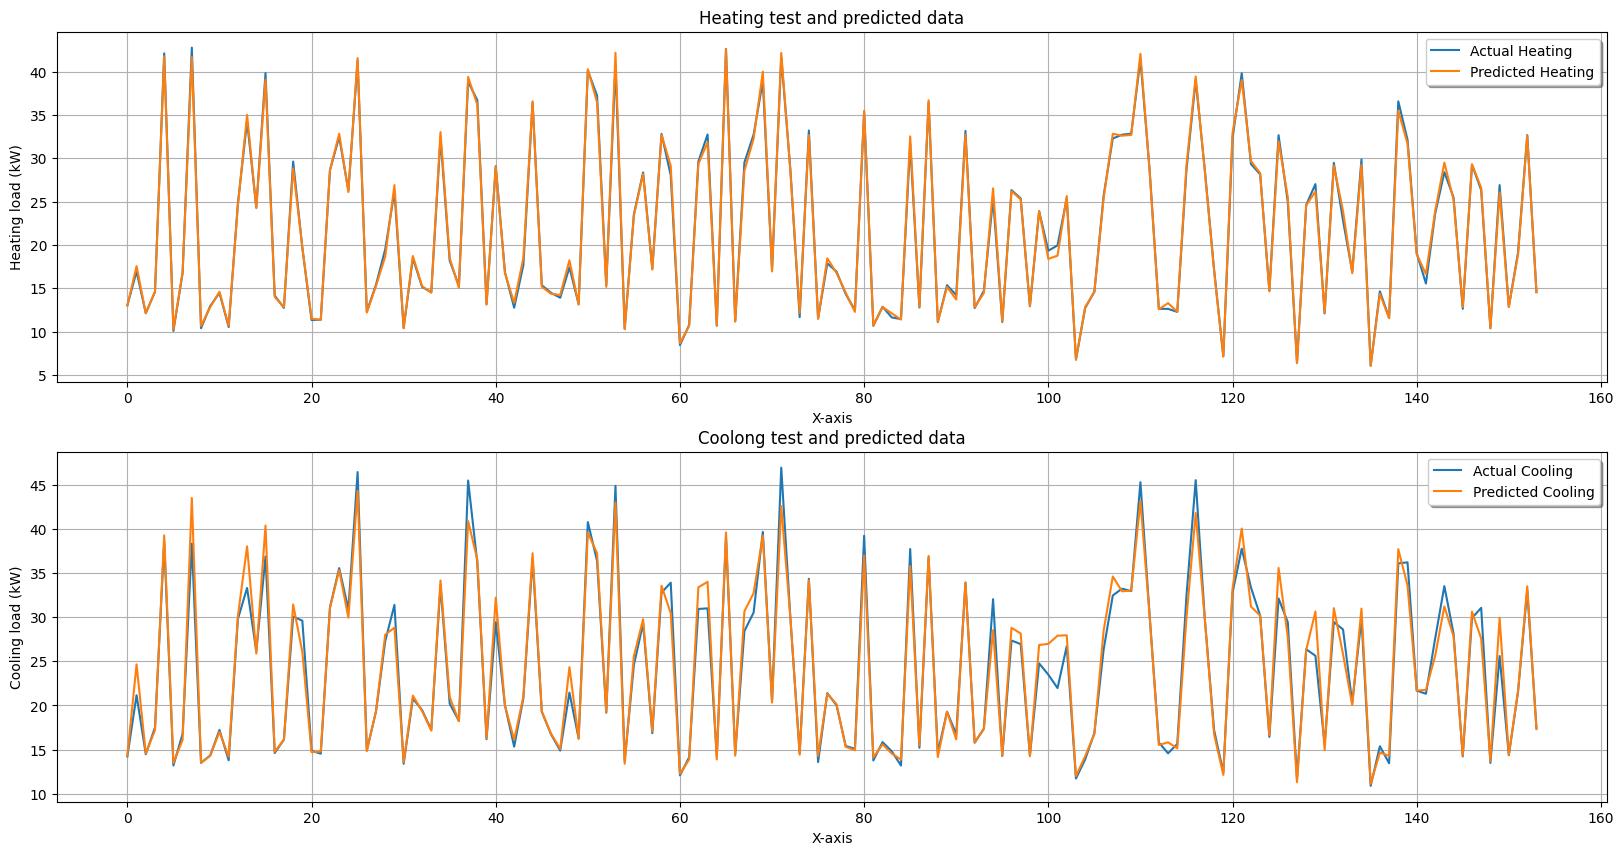

In [ ]:
x_ax = range(len(y1_test))
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(x_ax, y1_test, label="Actual Heating")
plt.plot(x_ax, RF_Heating_Predicion, label="Predicted Heating")
plt.title("Heating test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Heating load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_ax, y2_test, label="Actual Cooling")
plt.plot(x_ax,RF_Cooling_Predicion, label="Predicted Cooling")
plt.title("Coolong test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Cooling load (kW)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

plt.show()